<a href="https://colab.research.google.com/github/fahad3345/Next-Word-Prediction/blob/main/Next_word_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense,GRU, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

In [2]:
#Step 2: Load your file
from google.colab import files
uploaded = files.upload()

Saving book.txt to book.txt


### Step 3: Open and pre-process the data

In [3]:
#Step 3: Open and pre-process the data
file = open("book.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines)

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:700]

'The Project Gutenberg eBook of The Answering Voice This ebook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this ebook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook. Title: The Answering VoiceOne Hundred Love Lyrics by Women Compiler: Sara Teasdale Release date: August 4, 2023 [eBook #71343] Language: English Original publication: Boston: Houghton Mifflin, 1917 Credits:'

In [4]:
len(data)

93464

### Step 4: Implement tokenization and make additional adjustments

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 23, 54, 186, 5, 1, 351, 258, 29, 186, 16, 11, 1, 147, 5]

In [6]:
len(sequence_data)

17348

In [7]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

3076


In [8]:
sequences = []
for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  17345


array([[  1,  23,  54, 186],
       [ 23,  54, 186,   5],
       [ 54, 186,   5,   1],
       [186,   5,   1, 351],
       [  5,   1, 351, 258],
       [  1, 351, 258,  29],
       [351, 258,  29, 186],
       [258,  29, 186,  16],
       [ 29, 186,  16,  11],
       [186,  16,  11,   1]])

In [9]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])

X = np.array(X)
y = np.array(y)
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[  1  23  54]
 [ 23  54 186]
 [ 54 186   5]
 [186   5   1]
 [  5   1 351]
 [  1 351 258]
 [351 258  29]
 [258  29 186]
 [ 29 186  16]
 [186  16  11]]
Response:  [186   5   1 351 258  29 186  16  11   1]


In [10]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
# Split your data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=30)

### Step 5: Creating the model

In [12]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(Dropout(0.2))  #extra one
model.add(LSTM(1000))
model.add(Dropout(0.2))  #extra one
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             30760     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 dropout (Dropout)           (None, 3, 1000)           0         
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 3076)              3

In [13]:
#GRU model
gru_model = Sequential()
gru_model.add(Embedding(vocab_size, 10, input_length=3))
gru_model.add(GRU(1000, return_sequences=True))   # Add a GRU layer with 1000 units
gru_model.add(Dropout(0.2))
gru_model.add(GRU(1000))    # Add another GRU layer with 1000 units
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1000, activation="relu"))    # Add a Dense layer with 1000 units and ReLU activation
gru_model.add(Dense(vocab_size, activation="softmax"))   # Add the output Dense layer with vocab_size units and softmax activation
gru_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3, 10)             30760     
                                                                 
 gru (GRU)                   (None, 3, 1000)           3036000   
                                                                 
 dropout_2 (Dropout)         (None, 3, 1000)           0         
                                                                 
 gru_1 (GRU)                 (None, 1000)              6006000   
                                                                 
 dropout_3 (Dropout)         (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 3076)             

In [14]:
#Bidirectional LSTM

Bi_model = Sequential()  # Create a Sequential model
Bi_model.add(Embedding(vocab_size, 10, input_length=3))   # Add an Embedding layer
Bi_model.add(Bidirectional(LSTM(1000, return_sequences=True)))   # Add a Bidirectional LSTM layer with 1000 units
Bi_model.add(Dropout(0.2))
Bi_model.add(Bidirectional(LSTM(1000)))     # Add another Bidirectional LSTM layer with 1000 units
Bi_model.add(Dropout(0.2))
Bi_model.add(Dense(1000, activation="relu"))    # Add a Dense layer with 1000 units and ReLU activation
Bi_model.add(Dense(vocab_size, activation="softmax"))    # Add the output Dense layer with vocab_size units and softmax activation
Bi_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 3, 10)             30760     
                                                                 
 bidirectional (Bidirection  (None, 3, 2000)           8088000   
 al)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 3, 2000)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 2000)              24008000  
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 2000)              0         
                                                                 
 dense_4 (Dense)             (None, 1000)             

### Step 6: Plot the model

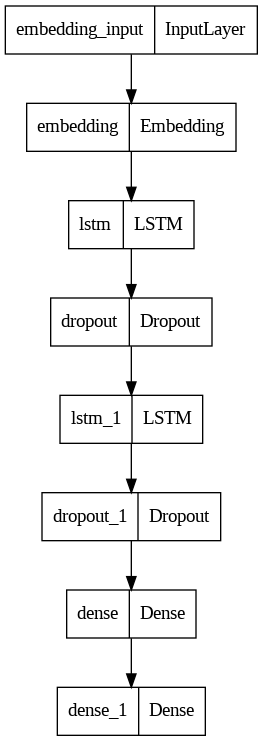

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='plot.png', show_layer_names=True)

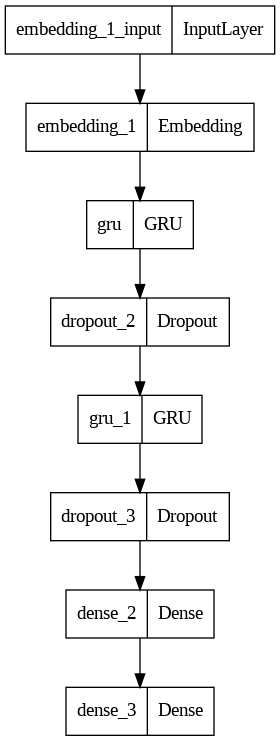

In [16]:
#GRU model plot
plot_model(gru_model, to_file='plot1.png', show_layer_names=True)

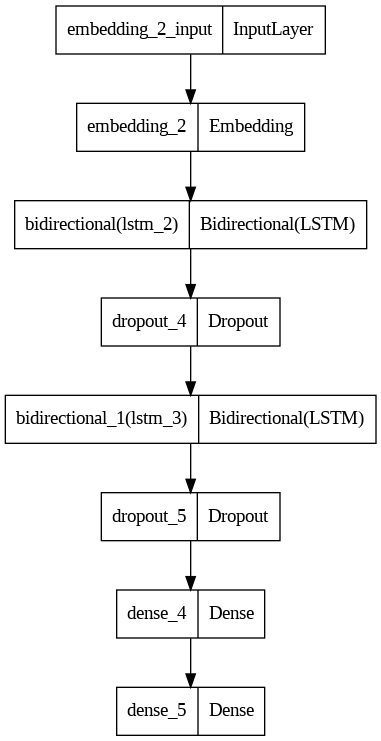

In [17]:
#Bideirectional LSTM
plot_model(Bi_model, to_file='plot2.png', show_layer_names=True)

### Step 7: Train the model

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, batch_size=50, callbacks=[checkpoint])

Epoch 1/30
293/295 [============================>.] - ETA: 0s - loss: 6.8607 - accuracy: 0.0491
Epoch 1: loss improved from inf to 6.86165, saving model to next_words.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


295/295 [==============================] - 20s 33ms/step - loss: 6.8616 - accuracy: 0.0491
Epoch 2/30
294/295 [============================>.] - ETA: 0s - loss: 6.4375 - accuracy: 0.0559
Epoch 2: loss improved from 6.86165 to 6.43697, saving model to next_words.h5
295/295 [==============================] - 5s 15ms/step - loss: 6.4370 - accuracy: 0.0558
Epoch 3/30
292/295 [============================>.] - ETA: 0s - loss: 6.1645 - accuracy: 0.0636
Epoch 3: loss improved from 6.43697 to 6.16022, saving model to next_words.h5
295/295 [==============================] - 5s 16ms/step - loss: 6.1602 - accuracy: 0.0633
Epoch 4/30
292/295 [============================>.] - ETA: 0s - loss: 5.8892 - accuracy: 0.0697
Epoch 4: loss improved from 6.16022 to 5.88616, saving model to next_words.h5
295/295 [==============================] - 5s 17ms/step - loss: 5.8862 - accuracy: 0.0699
Epoch 5/30
292/295 [============================>.] - ETA: 0s - loss: 5.5742 - accuracy: 0.0761
Epoch 5: loss improve

In [19]:
#GRU model

# Define a ModelCheckpoint callback
checkpoint = ModelCheckpoint("next_words_gru.h5", monitor='loss', verbose=1, save_best_only=True)
gru_model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])   # Compile the GRU model
gru_model.fit(X_train, y_train, epochs=40, batch_size=50, callbacks=[checkpoint])     # Train the GRU model

Epoch 1/40
291/295 [============================>.] - ETA: 0s - loss: 6.8226 - accuracy: 0.0504
Epoch 1: loss improved from inf to 6.81988, saving model to next_words_gru.h5
295/295 [==============================] - 12s 26ms/step - loss: 6.8199 - accuracy: 0.0504
Epoch 2/40
293/295 [============================>.] - ETA: 0s - loss: 6.3415 - accuracy: 0.0617
Epoch 2: loss improved from 6.81988 to 6.34091, saving model to next_words_gru.h5
295/295 [==============================] - 4s 13ms/step - loss: 6.3409 - accuracy: 0.0618
Epoch 3/40
295/295 [==============================] - ETA: 0s - loss: 6.0159 - accuracy: 0.0691
Epoch 3: loss improved from 6.34091 to 6.01587, saving model to next_words_gru.h5
295/295 [==============================] - 4s 15ms/step - loss: 6.0159 - accuracy: 0.0691
Epoch 4/40
295/295 [==============================] - ETA: 0s - loss: 5.6562 - accuracy: 0.0820
Epoch 4: loss improved from 6.01587 to 5.65620, saving model to next_words_gru.h5
295/295 [============

In [20]:
# Bidirectional LSTM
checkpoint = ModelCheckpoint("next_words_bi_lstm.h5", monitor='loss', verbose=1, save_best_only=True)

# Compile the Bidirectional LSTM model
Bi_model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the Bidirectional LSTM model (replace X_train and y_train with your data)
Bi_model.fit(X_train, y_train, epochs=40, batch_size=50, callbacks=[checkpoint])

Epoch 1/40
295/295 [==============================] - ETA: 0s - loss: 6.7905 - accuracy: 0.0510
Epoch 1: loss improved from inf to 6.79053, saving model to next_words_bi_lstm.h5
295/295 [==============================] - 21s 44ms/step - loss: 6.7905 - accuracy: 0.0510
Epoch 2/40
295/295 [==============================] - ETA: 0s - loss: 6.3237 - accuracy: 0.0615
Epoch 2: loss improved from 6.79053 to 6.32368, saving model to next_words_bi_lstm.h5
295/295 [==============================] - 10s 33ms/step - loss: 6.3237 - accuracy: 0.0615
Epoch 3/40
294/295 [============================>.] - ETA: 0s - loss: 6.0236 - accuracy: 0.0694
Epoch 3: loss improved from 6.32368 to 6.02352, saving model to next_words_bi_lstm.h5
295/295 [==============================] - 10s 33ms/step - loss: 6.0235 - accuracy: 0.0693
Epoch 4/40
295/295 [==============================] - ETA: 0s - loss: 5.6883 - accuracy: 0.0820
Epoch 4: loss improved from 6.02352 to 5.68833, saving model to next_words_bi_lstm.h5
295

In [21]:
# Load the LSTM model from the checkpoint
model = load_model("next_words.h5")

# Evaluate the LSTM model on the test data
lstm_test_loss, lstm_test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy for the LSTM model
print("LSTM Test Accuracy:", lstm_test_accuracy)

# Load the GRU model from the checkpoint
gru_model = load_model("next_words_gru.h5")

# Evaluate the GRU model on the test data
gru_test_loss, gru_test_accuracy = gru_model.evaluate(X_test, y_test)

# Print the test accuracy for the GRU model
print("GRU Test Accuracy:", gru_test_accuracy)

# Load the Bidirectional LSTM model from the checkpoint
bi_model = load_model("next_words_bi_lstm.h5")

# Evaluate the Bidirectional LSTM model on the test data
bi_test_loss, bi_test_accuracy = bi_model.evaluate(X_test, y_test)

# Print the test accuracy for the Bidirectional LSTM model
print("Bidirectional LSTM Test Accuracy:", bi_test_accuracy)


82/82 [==============================] - 1s 8ms/step - loss: 20.0792 - accuracy: 0.1491
LSTM Test Accuracy: 0.14911606907844543
82/82 [==============================] - 1s 7ms/step - loss: 20.4097 - accuracy: 0.1580
GRU Test Accuracy: 0.15795542299747467
82/82 [==============================] - 3s 12ms/step - loss: 19.4414 - accuracy: 0.1729
Bidirectional LSTM Test Accuracy: 0.17294389009475708


### Step 8: Let’s predict

In [22]:
# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break

  print(predicted_word)
  return predicted_word

In [23]:
while(True):
  text = input("Enter your line: ")

  if text == "0":
      print("Execution completed.....")
      break

  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)

          Predict_Next_Words(model, tokenizer, text)

      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: i'm going to
["i'm", 'going', 'to']
Error occurred:  in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2283, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_in